In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

## 1. Exploración inicial del dataset


### 1.1 Carga de datos


In [4]:
df = pd.read_csv('supermarketsales.csv')

### 1.2 Dimensiones y tipos de variables

In [6]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [7]:
df.shape

(1000, 17)

In [8]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

### 1.3 Revisión de valores nulos y duplicados

In [10]:
# Cantidad de valores nulos por columna

print(f"Valores nulos por columna:\n{df.isnull().sum()}\n")

# Porcentaje de valores nulos por columna

print(f"Porcentaje de valores nulos por columna:\n{(df.isnull().mean() * 100).round(2)}\n")

Valores nulos por columna:
Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

Porcentaje de valores nulos por columna:
Invoice ID                 0.0
Branch                     0.0
City                       0.0
Customer type              0.0
Gender                     0.0
Product line               0.0
Unit price                 0.0
Quantity                   0.0
Tax 5%                     0.0
Total                      0.0
Date                       0.0
Time                       0.0
Payment                    0.0
cogs                  

In [11]:
# Duplicados en filas
print(f"Filas duplicadas: {df.duplicated().sum()}")

# Valores únicos por columna
print(f"Valores únicos por columna:\n {df.nunique()}")

Filas duplicadas: 0
Valores únicos por columna:
 Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64


### 1.4 Estadísticas descriptivas generales y visualización básica

In [13]:
# Resumen estadístico

# Columnas categóricas o numéricas

categoricas = ['Gender', 'Branch', 'Product line', 'Payment', 'City', 'Customer type']
numericas = ['Unit price', 'Quantity', 'Tax 5%', 'Total',   'cogs',   'gross margin percentage',   'gross income',   'Rating']

df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [14]:
# Variables categóricas 

# Distribución de género

print(df["Gender"].value_counts())

# Distribución de sucursales

print(df["Branch"].value_counts())

# Distribución de líneas de producto

print(df["Product line"].value_counts())

# Distribución de método de pago

print(df["Payment"].value_counts())

# Distribución de ciudades

print(df["City"].value_counts())

# Distribución de clientes

print(df["Customer type"].value_counts())

Gender
Female    501
Male      499
Name: count, dtype: int64
Branch
A    340
B    332
C    328
Name: count, dtype: int64
Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64
Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64
City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64
Customer type
Member    501
Normal    499
Name: count, dtype: int64


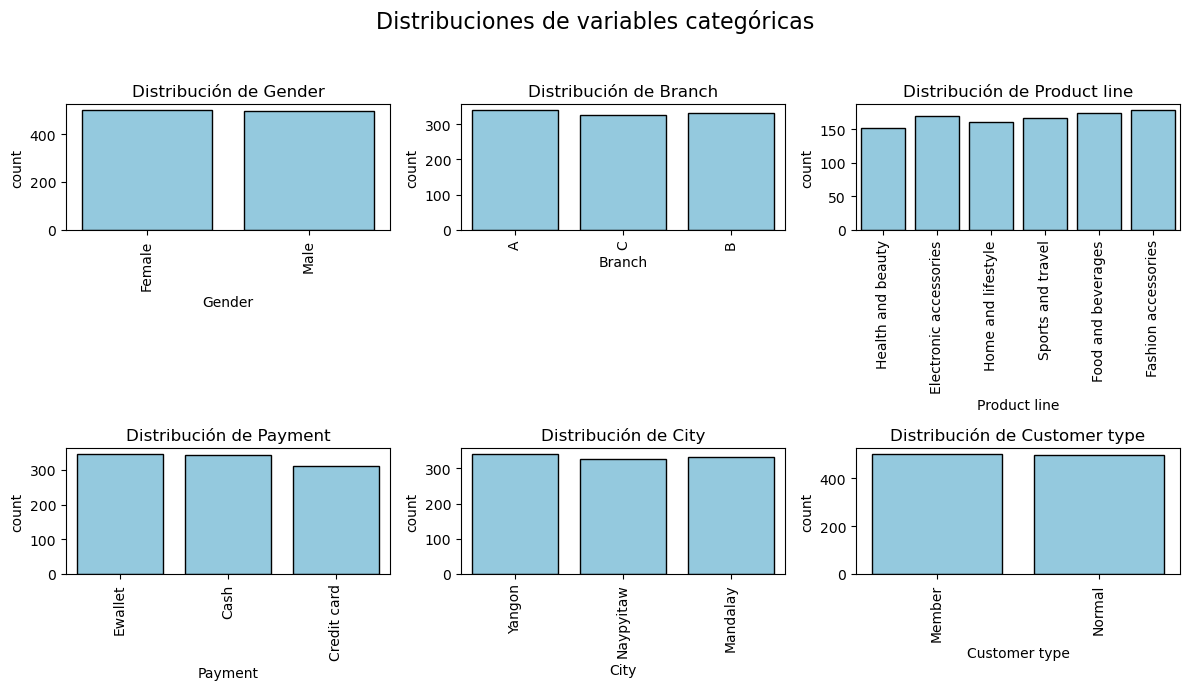

In [15]:
# Crear subplots: 2 filas, 3 columnas

fig, axes = plt.subplots(2, 3, figsize=(12, 7))

# Convertir en 1D 

axes = axes.flatten()

# Graficar cada variable categórica

for i, col in enumerate(categoricas):
    sns.countplot(data=df, x=col, ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribución de {col}')
    axes[i].tick_params(axis='x', rotation=90)

fig.suptitle('Distribuciones de variables categóricas', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

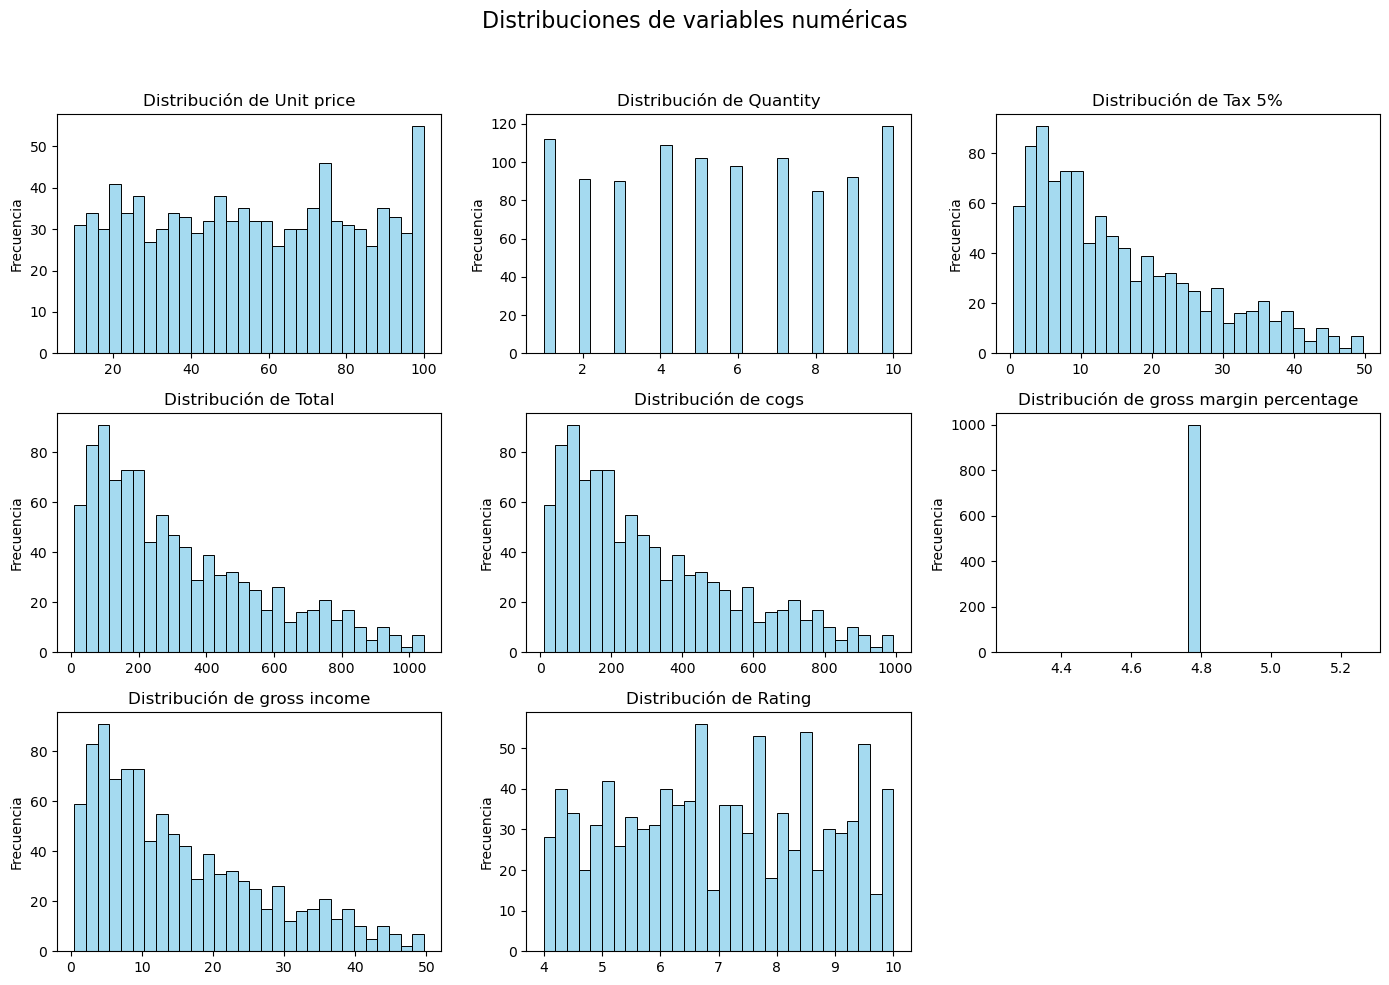

In [16]:
# Crear subplots: 3 filas, 3 columnas

fig, axes = plt.subplots(3, 3, figsize=(14, 10))
axes = axes.flatten()


# Graficar cada variable numérica

for i, col in enumerate(numericas):
    sns.histplot(data=df, x=col, bins=30, ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Frecuencia")

# Eliminar subplots vacíos si hay

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Distribuciones de variables numéricas', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# 2 Limpieza y preparación de los datos

## 2.1 Tratamiento de valores faltantes

In [19]:
# No existen valores faltantes.

## 2.2 Correción de tipos de datos

In [21]:
# Categópricas a tipo categórica

df[categoricas] = df[categoricas].astype('category')

# Date a tipo fecha

df['Date'] = pd.to_datetime(df['Date'])



In [22]:
# Comprobación

df.dtypes

Invoice ID                         object
Branch                           category
City                             category
Customer type                    category
Gender                           category
Product line                     category
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                          category
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

## 2.3 Detección y eliminación de duplicados


In [24]:
# No existen duplicados

# 3 Análisis univariado

## 3.1 Análisis descriptivo de variables numéricas

In [27]:
# Asimetría y curtosis

for col in numericas:
    sk = skew(df[col])
    kt = kurtosis(df[col])
    print(f"{col}:")
    print(f"  Asimetría (skewness): {sk:.3f}")
    print(f"  Curtosis (kurtosis): {kt:.3f}")
    print("-" * 30)

Unit price:
  Asimetría (skewness): 0.007
  Curtosis (kurtosis): -1.219
------------------------------
Quantity:
  Asimetría (skewness): 0.013
  Curtosis (kurtosis): -1.215
------------------------------
Tax 5%:
  Asimetría (skewness): 0.891
  Curtosis (kurtosis): -0.087
------------------------------
Total:
  Asimetría (skewness): 0.891
  Curtosis (kurtosis): -0.087
------------------------------
cogs:
  Asimetría (skewness): 0.891
  Curtosis (kurtosis): -0.087
------------------------------
gross margin percentage:
  Asimetría (skewness): nan
  Curtosis (kurtosis): nan
------------------------------
gross income:
  Asimetría (skewness): 0.891
  Curtosis (kurtosis): -0.087
------------------------------
Rating:
  Asimetría (skewness): 0.009
  Curtosis (kurtosis): -1.152
------------------------------


C:\Users\Franco\AppData\Local\Temp\ipykernel_10356\1766444288.py:4: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sk = skew(df[col])
C:\Users\Franco\AppData\Local\Temp\ipykernel_10356\1766444288.py:5: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kt = kurtosis(df[col])


## 3.2 Detección de Outliers

In [29]:
# Recorrer las variables numéricas

for col in numericas:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    limite_inferior = Q1 - 1.5 * IQR
    
    # Ajustar el límite inferior a 0 para no obtener negativos
    
    if col in numericas and limite_inferior < 0:
        limite_inferior = 0
    
    limite_superior = Q3 + 1.5 * IQR
    outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)]
    
    print(f"Columna '{col}':")
    print(f"  Límite inferior ajustado: {limite_inferior:.2f}")
    print(f"  Límite superior: {limite_superior:.2f}")
    print(f"  Outliers encontrados: {len(outliers)}\n")

Columna 'Unit price':
  Límite inferior ajustado: 0.00
  Límite superior: 145.53
  Outliers encontrados: 0

Columna 'Quantity':
  Límite inferior ajustado: 0.00
  Límite superior: 15.50
  Outliers encontrados: 0

Columna 'Tax 5%':
  Límite inferior ajustado: 0.00
  Límite superior: 47.23
  Outliers encontrados: 9

Columna 'Total':
  Límite inferior ajustado: 0.00
  Límite superior: 991.74
  Outliers encontrados: 9

Columna 'cogs':
  Límite inferior ajustado: 0.00
  Límite superior: 944.52
  Outliers encontrados: 9

Columna 'gross margin percentage':
  Límite inferior ajustado: 4.76
  Límite superior: 4.76
  Outliers encontrados: 0

Columna 'gross income':
  Límite inferior ajustado: 0.00
  Límite superior: 47.23
  Outliers encontrados: 9

Columna 'Rating':
  Límite inferior ajustado: 1.00
  Límite superior: 13.00
  Outliers encontrados: 0



## 3.3 Distribución y visualización de variables numéricas

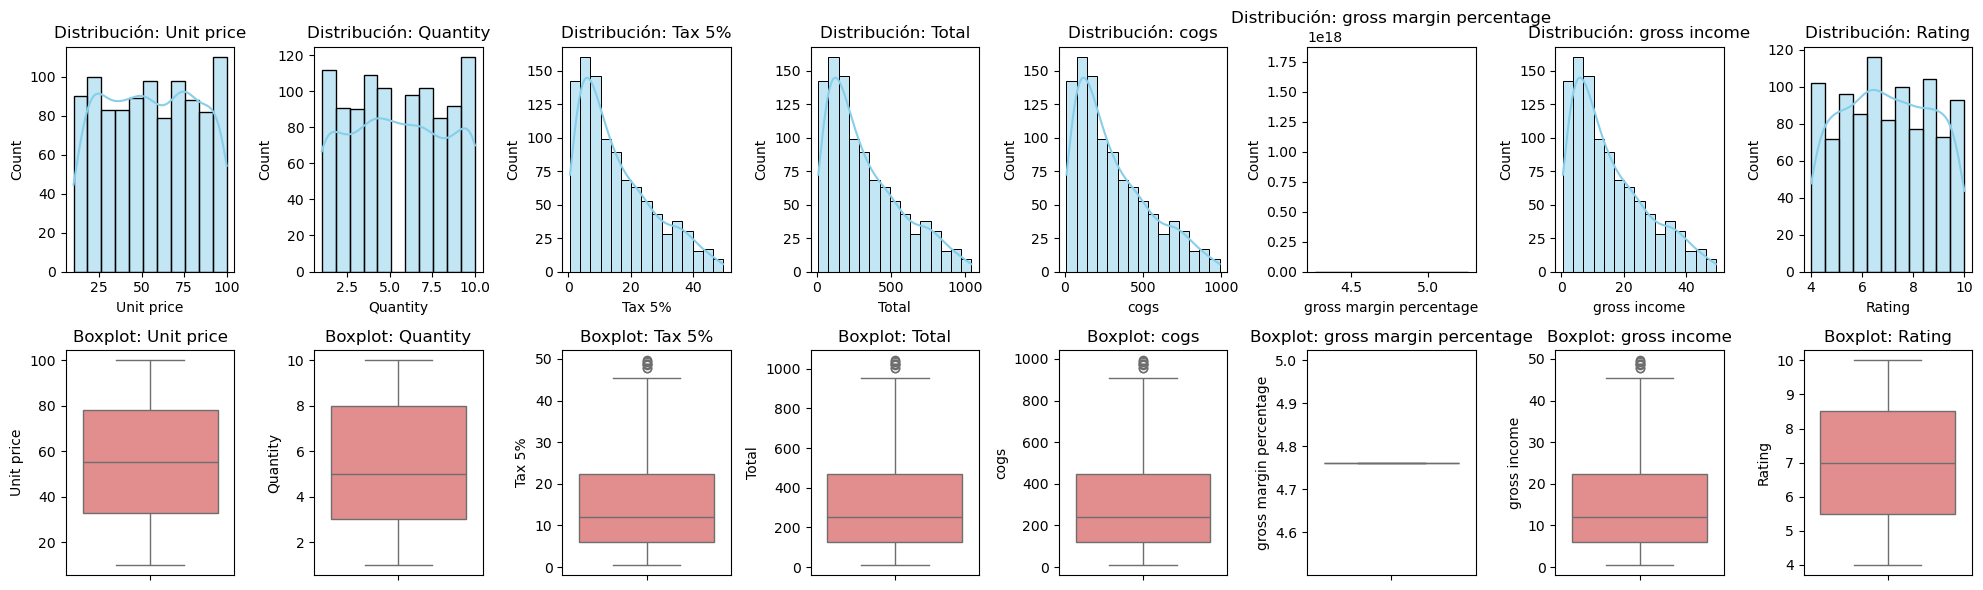

In [31]:
# Histograma + Boxplot para numéricas 

fig, axes = plt.subplots(2, len(numericas), figsize=(20, 6))

for i, col in enumerate(numericas):
    # Histograma
    sns.histplot(df[col], ax=axes[0, i], kde=True, color='skyblue')
    axes[0, i].set_title(f'Distribución: {col}')
    
    # Boxplot
    sns.boxplot(y=df[col], ax=axes[1, i], color='lightcoral')
    axes[1, i].set_title(f'Boxplot: {col}')

plt.tight_layout()
plt.show()

## 3.4 Análisis de variables categóricas

In [33]:
# Frecuencias absolutas y relativas

for col in categoricas:
    print(f"\nColumna: {col}")
    print(df[col].value_counts())
    print("\nFrecuencia relativa (%):")
    print(round(df[col].value_counts(normalize=True) * 100, 2))


Columna: Gender
Gender
Female    501
Male      499
Name: count, dtype: int64

Frecuencia relativa (%):
Gender
Female    50.1
Male      49.9
Name: proportion, dtype: float64

Columna: Branch
Branch
A    340
B    332
C    328
Name: count, dtype: int64

Frecuencia relativa (%):
Branch
A    34.0
B    33.2
C    32.8
Name: proportion, dtype: float64

Columna: Product line
Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

Frecuencia relativa (%):
Product line
Fashion accessories       17.8
Food and beverages        17.4
Electronic accessories    17.0
Sports and travel         16.6
Home and lifestyle        16.0
Health and beauty         15.2
Name: proportion, dtype: float64

Columna: Payment
Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64

Frecuencia relativa (%):
Payment
Ewallet   

# 4 Análisis bivariado

## 4.1 Correlaciones

Matriz de correlación:

              Unit price  Quantity  Tax 5%  Total  cogs  gross income  Rating
Unit price          1.00      0.01    0.63   0.63  0.63          0.63   -0.01
Quantity            0.01      1.00    0.71   0.71  0.71          0.71   -0.02
Tax 5%              0.63      0.71    1.00   1.00  1.00          1.00   -0.04
Total               0.63      0.71    1.00   1.00  1.00          1.00   -0.04
cogs                0.63      0.71    1.00   1.00  1.00          1.00   -0.04
gross income        0.63      0.71    1.00   1.00  1.00          1.00   -0.04
Rating             -0.01     -0.02   -0.04  -0.04 -0.04         -0.04    1.00


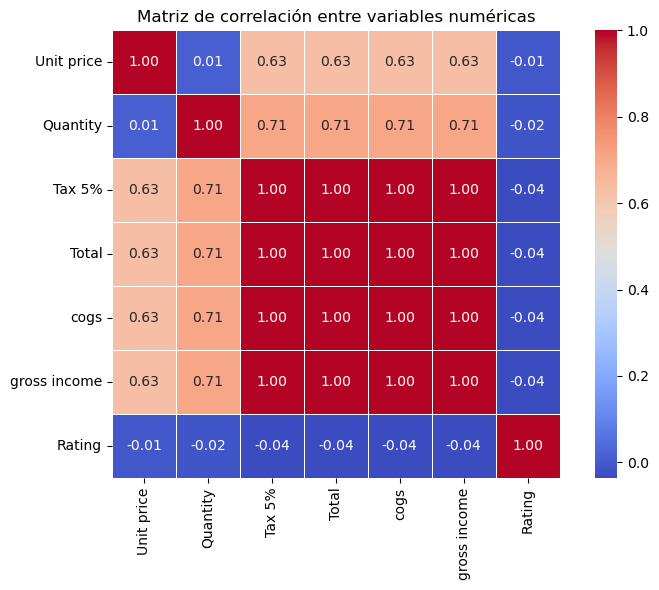

In [36]:
# Excluir gmp debido a que es un valor constante

numericas_corr = [col for col in numericas if col != 'gross margin percentage']

# Calcular matriz de correlación

corr_matrix = df[numericas_corr].corr()

# Mostrar matriz de correlación en valores numéricos

print("Matriz de correlación:\n")
print(corr_matrix.round(2))

# Mapa de calor

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Matriz de correlación entre variables numéricas')
plt.tight_layout()
plt.show()

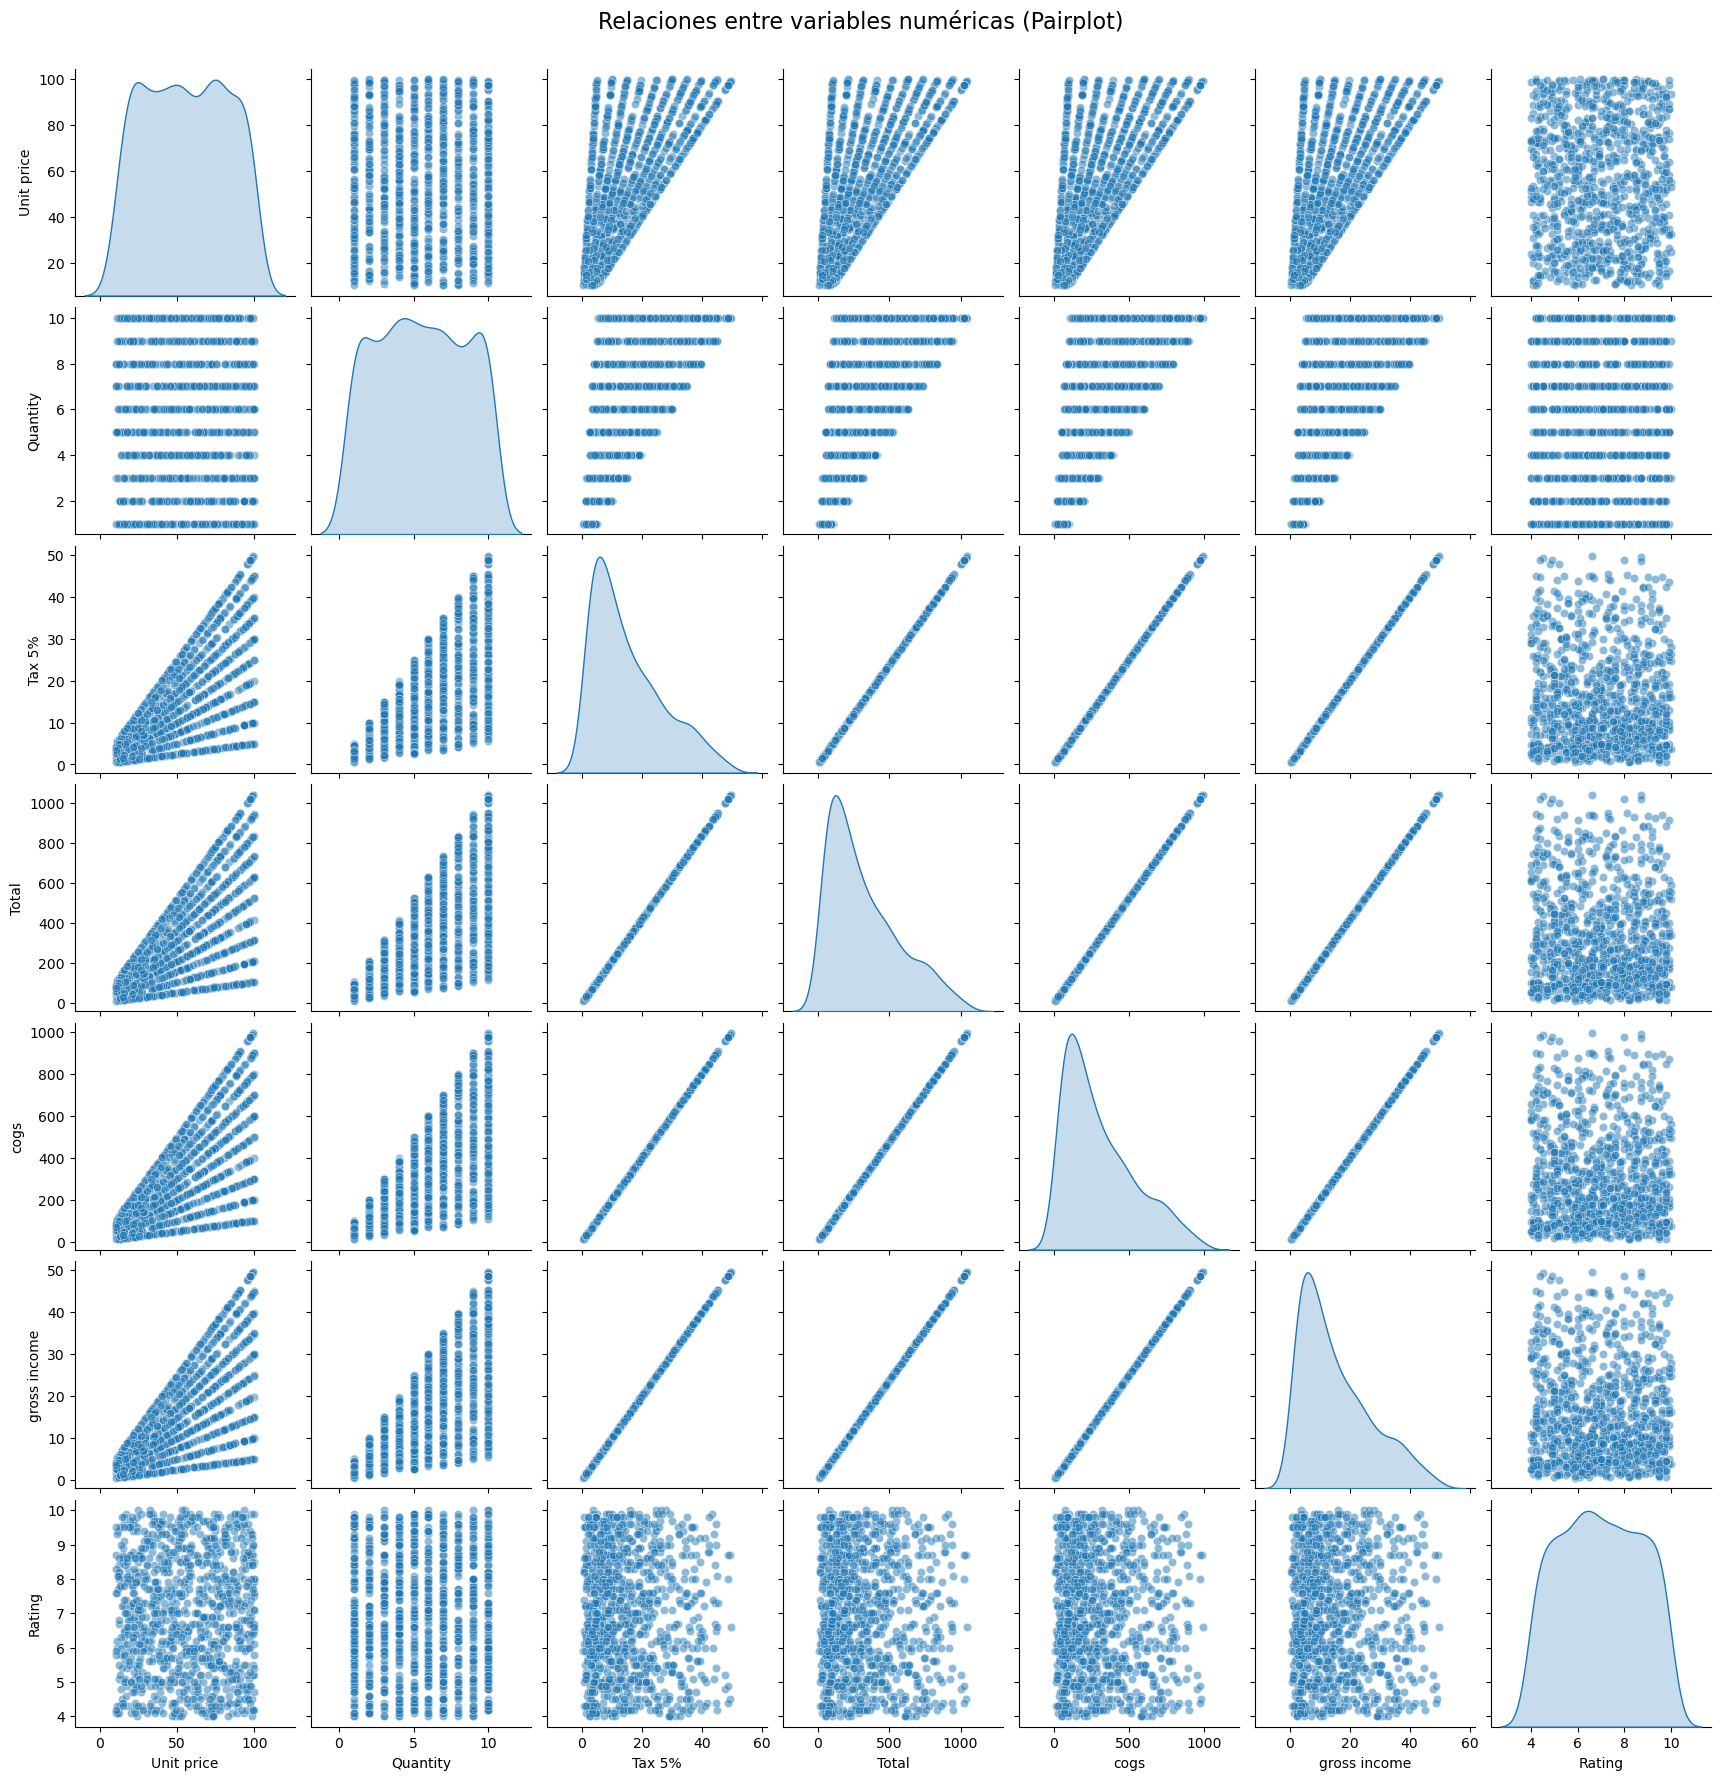

In [37]:
# Pairplot

# Excluir gmp

numericas_corr = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross income', 'Rating']

# Crear el pairplot

sns.pairplot(df[numericas_corr], diag_kind='kde', plot_kws={'alpha': 0.5})

plt.suptitle('Relaciones entre variables numéricas (Pairplot)', fontsize=16, y=1.02)
plt.show()

## 4.2 Comparación de variables numéricas según categorías

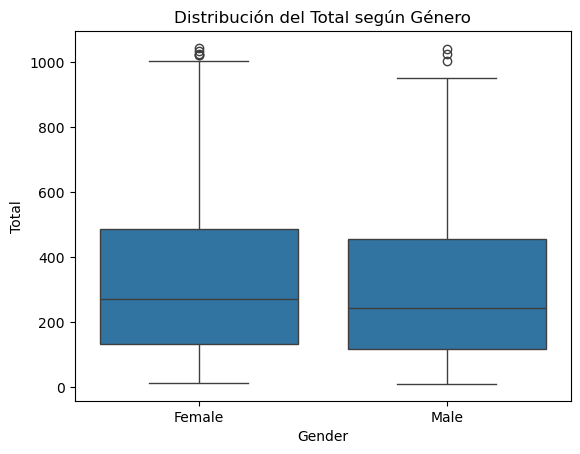

In [39]:
# Según género

sns.boxplot(data=df, x='Gender', y='Total')
plt.title('Distribución del Total según Género')
plt.show()

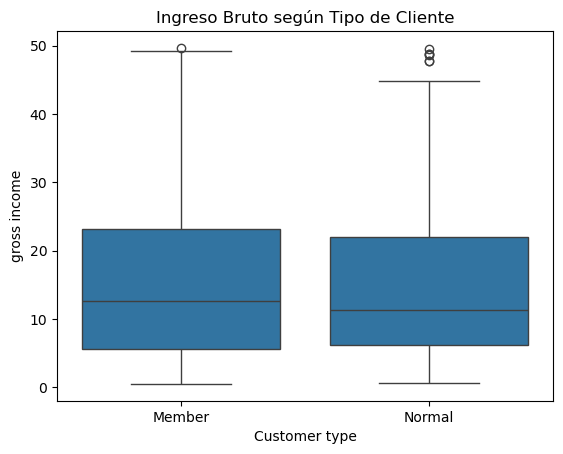

In [40]:
# Según tipo cliente

sns.boxplot(data=df, x='Customer type', y='gross income')
plt.title('Ingreso Bruto según Tipo de Cliente')
plt.show()

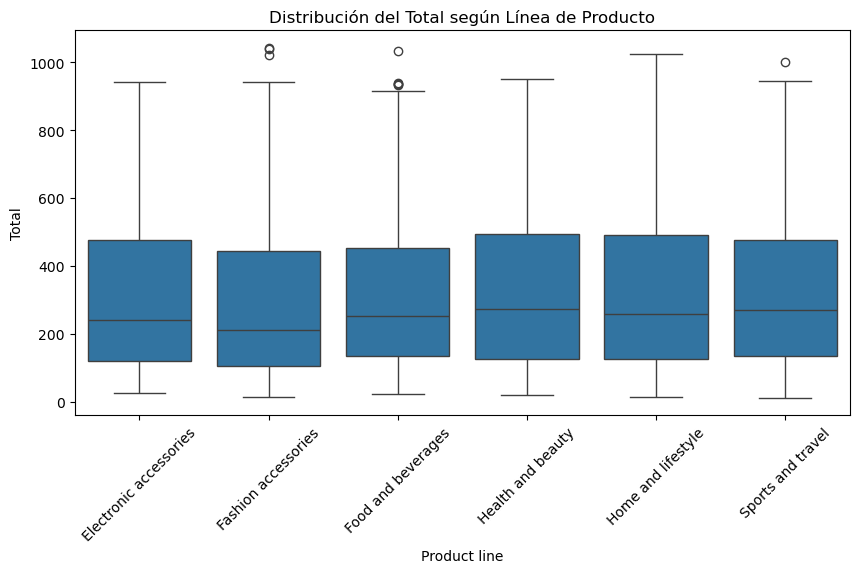

In [41]:
# Línea de producto 

plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Product line', y='Total')
plt.xticks(rotation=45)
plt.title('Distribución del Total según Línea de Producto')
plt.show()

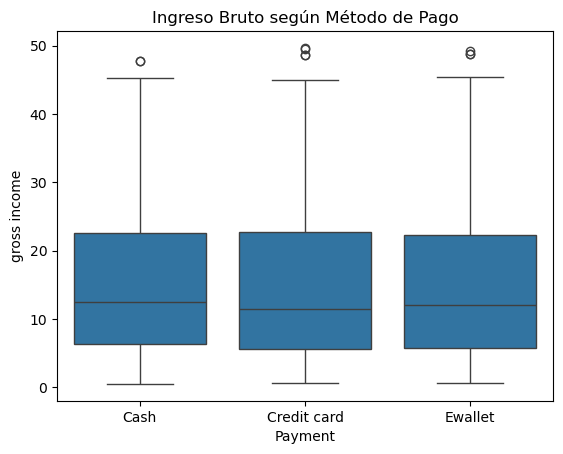

In [42]:
# Según pago

sns.boxplot(data=df, x='Payment', y='gross income')
plt.title('Ingreso Bruto según Método de Pago')
plt.show()

## 4.3 Relación entre variables categóricas

Tabla de contingencia: Gender vs Product line
Product line  Electronic accessories  Fashion accessories  Food and beverages  \
Gender                                                                          
Female                            84                   96                  90   
Male                              86                   82                  84   

Product line  Health and beauty  Home and lifestyle  Sports and travel  
Gender                                                                  
Female                       64                  79                 88  
Male                         88                  81                 78  


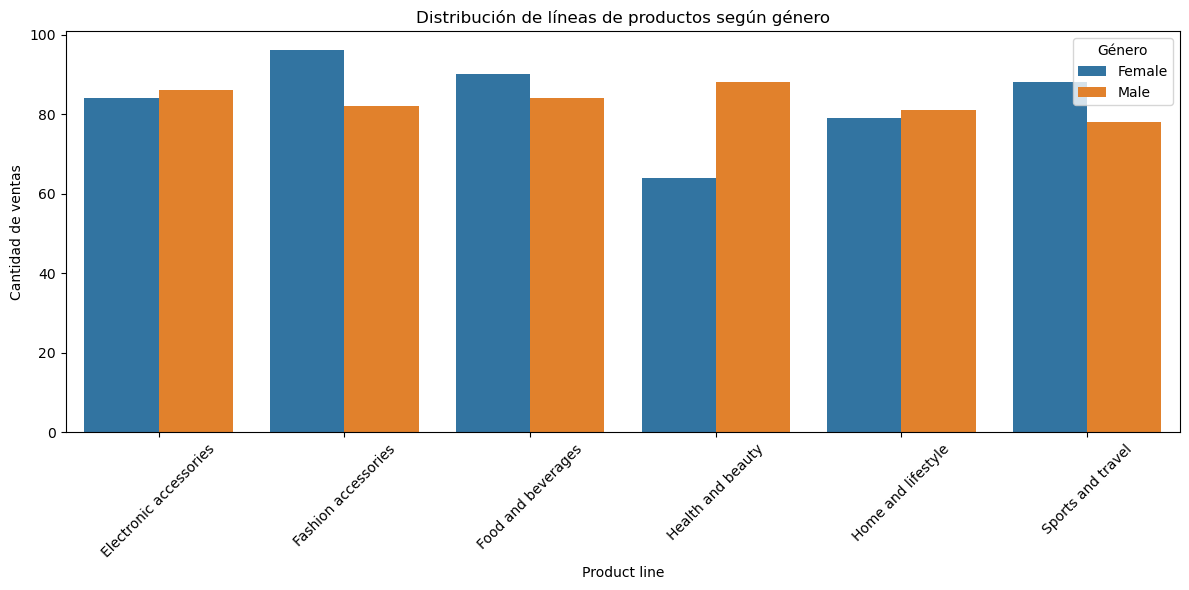

In [44]:
# 1 Género y línea de producto

# Tabla

contingency_1 = pd.crosstab(df['Gender'], df['Product line'])
print("Tabla de contingencia: Gender vs Product line")
print(contingency_1)


# Gráfico agrupado

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Product line', hue='Gender')
plt.title('Distribución de líneas de productos según género')
plt.xlabel('Product line')
plt.ylabel('Cantidad de ventas')
plt.xticks(rotation=45)
plt.legend(title='Género')
plt.tight_layout()
plt.show()

Tabla de contingencia: Customer type vs Payment
Payment        Cash  Credit card  Ewallet
Customer type                            
Member          168          172      161
Normal          176          139      184


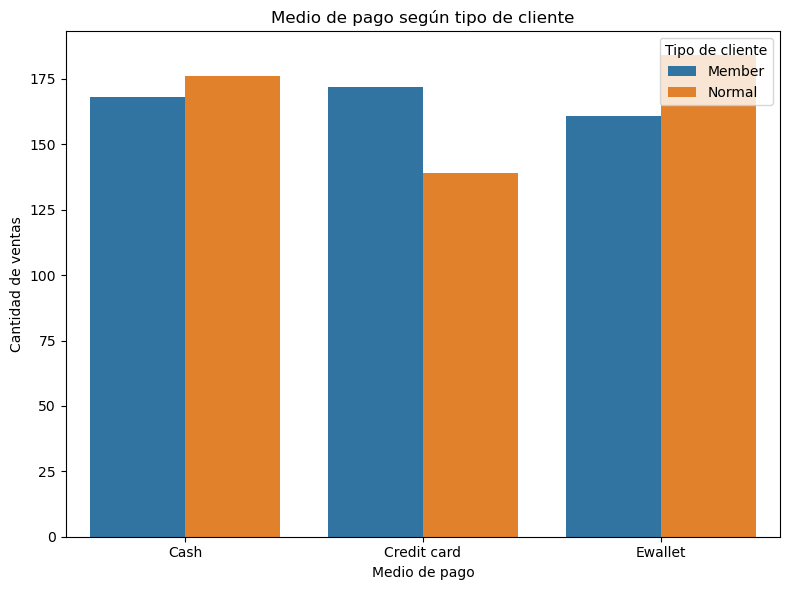

In [45]:
# 2 Tipo cliente y pago

# Tabla

contingency_2 = pd.crosstab(df['Customer type'], df['Payment'])
print("Tabla de contingencia: Customer type vs Payment")
print(contingency_2)


# Gráfico agrupado

plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Payment', hue='Customer type')
plt.title('Medio de pago según tipo de cliente')
plt.xlabel('Medio de pago')
plt.ylabel('Cantidad de ventas')
plt.legend(title='Tipo de cliente')
plt.tight_layout()
plt.show()

Tabla de contingencia: Payment vs Branch
Branch         A    B    C
Payment                   
Cash         110  110  124
Credit card  104  109   98
Ewallet      126  113  106


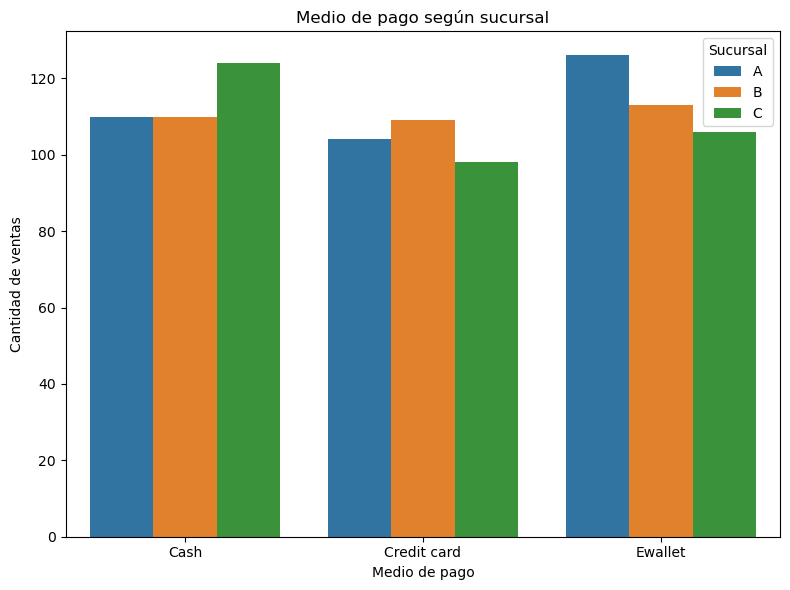

In [46]:
# 3 Pago y sucursal

# Tabla

contingency_3 = pd.crosstab(df['Payment'], df['Branch'])
print("Tabla de contingencia: Payment vs Branch")
print(contingency_3)


# Gráfico agrupado

plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Payment', hue='Branch')
plt.title('Medio de pago según sucursal')
plt.xlabel('Medio de pago')
plt.ylabel('Cantidad de ventas')
plt.legend(title='Sucursal')
plt.tight_layout()
plt.show()

# 5 Análisis multivariado

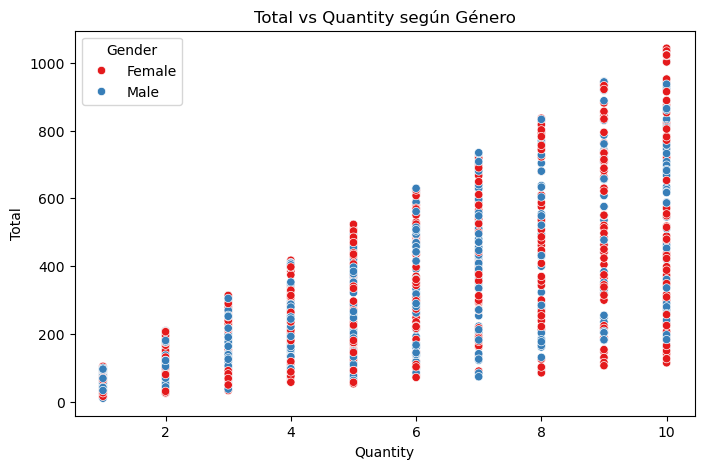

In [48]:
# 1 Total vs Cantidad (hue = Gender)

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Quantity', y='Total', hue='Gender', palette='Set1')
plt.title('Total vs Quantity según Género')
plt.xlabel('Quantity')
plt.ylabel('Total')
plt.show()



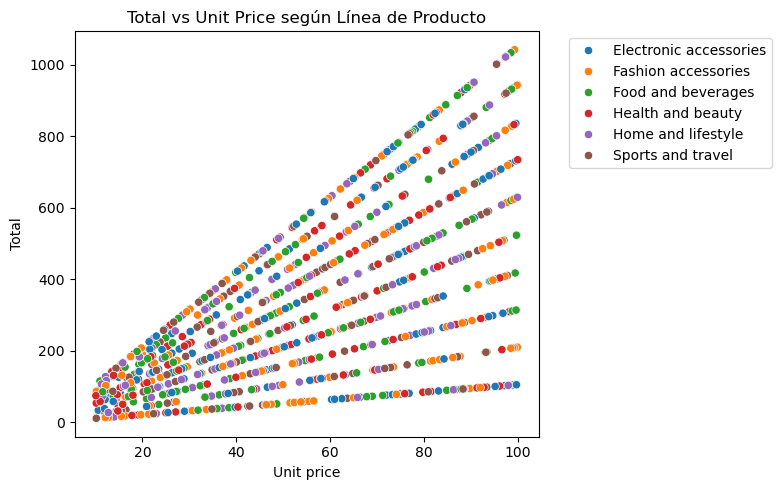

In [49]:
# 2 Unidad vs precio total, (hue=Product line)

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Unit price', y='Total', hue='Product line', palette='tab10')
plt.title('Total vs Unit Price según Línea de Producto')
plt.xlabel('Unit price')
plt.ylabel('Total')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

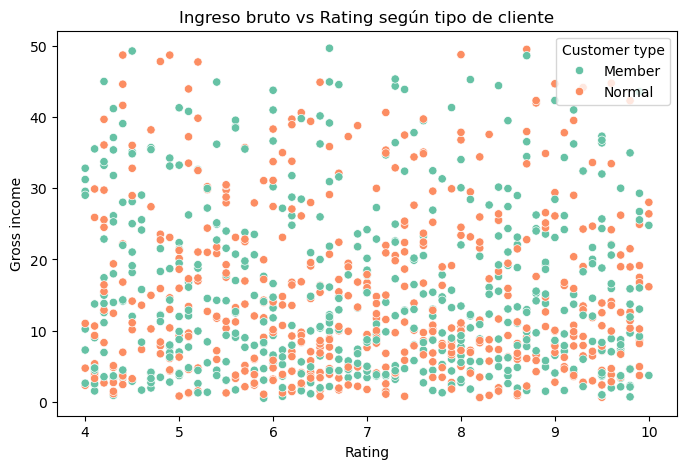

In [50]:
# 3 Ingreso bruto vs calificación (hue = Tipo cliente)

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Rating', y='gross income', hue='Customer type', palette='Set2')
plt.title('Ingreso bruto vs Rating según tipo de cliente')
plt.xlabel('Rating')
plt.ylabel('Gross income')
plt.show()

# 6 Análisis temporal

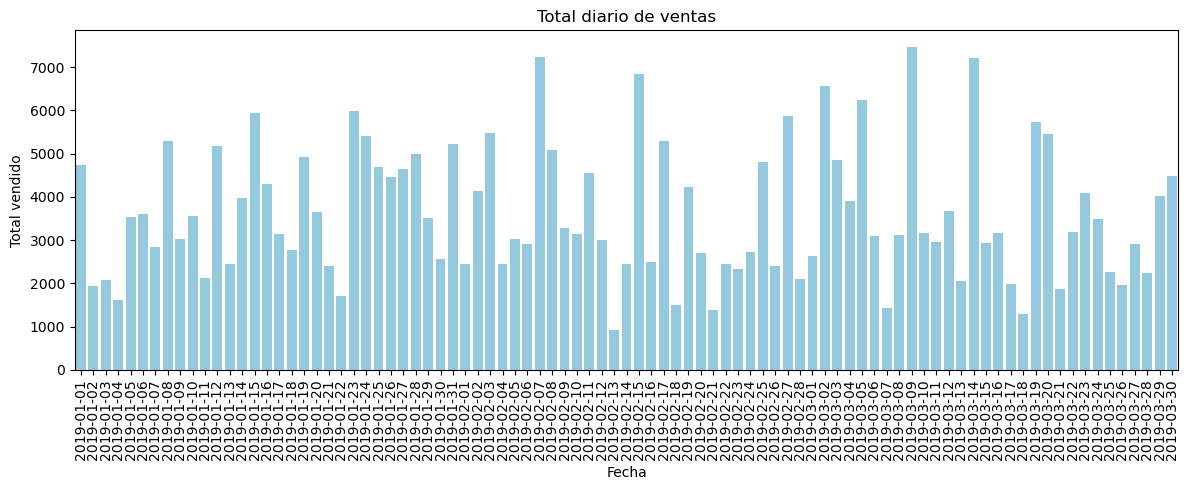

In [52]:
# 1 Total diario de ventas

ventas_diarias = df.groupby('Date')['Total'].sum().reset_index()

plt.figure(figsize=(12,5))
sns.barplot(data=ventas_diarias, x='Date', y='Total', color='skyblue')
plt.title('Total diario de ventas')
plt.ylabel('Total vendido')
plt.xlabel('Fecha')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

C:\Users\Franco\AppData\Local\Temp\ipykernel_10356\131054520.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ventas_genero = df.groupby(['Date', 'Gender'])['Total'].sum().reset_index()


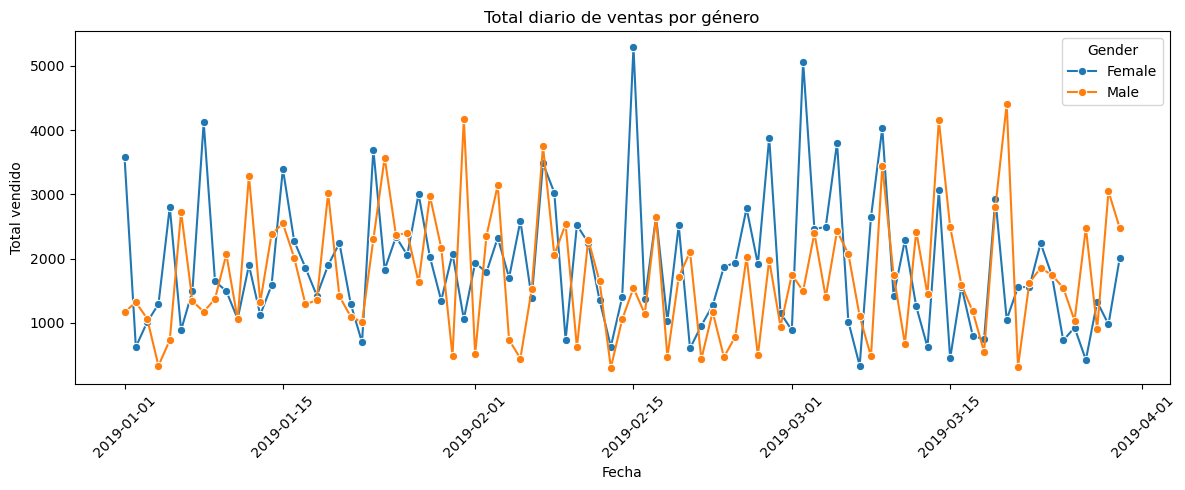

In [53]:
# 2 Total diario por género

ventas_genero = df.groupby(['Date', 'Gender'])['Total'].sum().reset_index()

plt.figure(figsize=(12,5))
sns.lineplot(data=ventas_genero, x='Date', y='Total', hue='Gender', marker='o')
plt.title('Total diario de ventas por género')
plt.ylabel('Total vendido')
plt.xlabel('Fecha')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Franco\AppData\Local\Temp\ipykernel_10356\535564720.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ventas_ciudad = df.groupby(['Date', 'City'])['Total'].sum().reset_index()


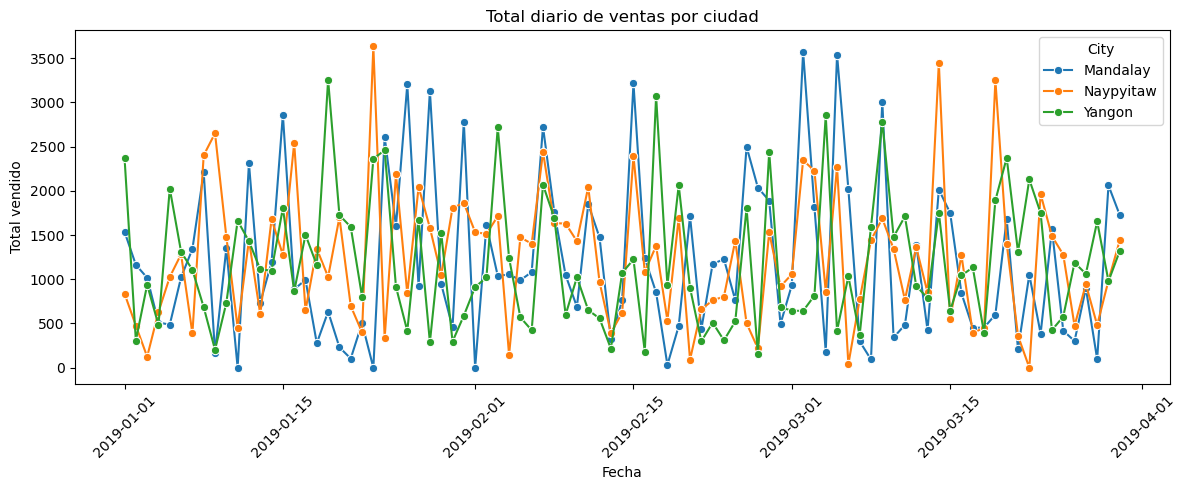

In [54]:
# 3 Total diario por ciudad

ventas_ciudad = df.groupby(['Date', 'City'])['Total'].sum().reset_index()

plt.figure(figsize=(12,5))
sns.lineplot(data=ventas_ciudad, x='Date', y='Total', hue='City', marker='o')
plt.title('Total diario de ventas por ciudad')
plt.ylabel('Total vendido')
plt.xlabel('Fecha')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Franco\AppData\Local\Temp\ipykernel_10356\626439855.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ventas_pago = df.groupby(['Date', 'Payment'])['Total'].sum().reset_index()


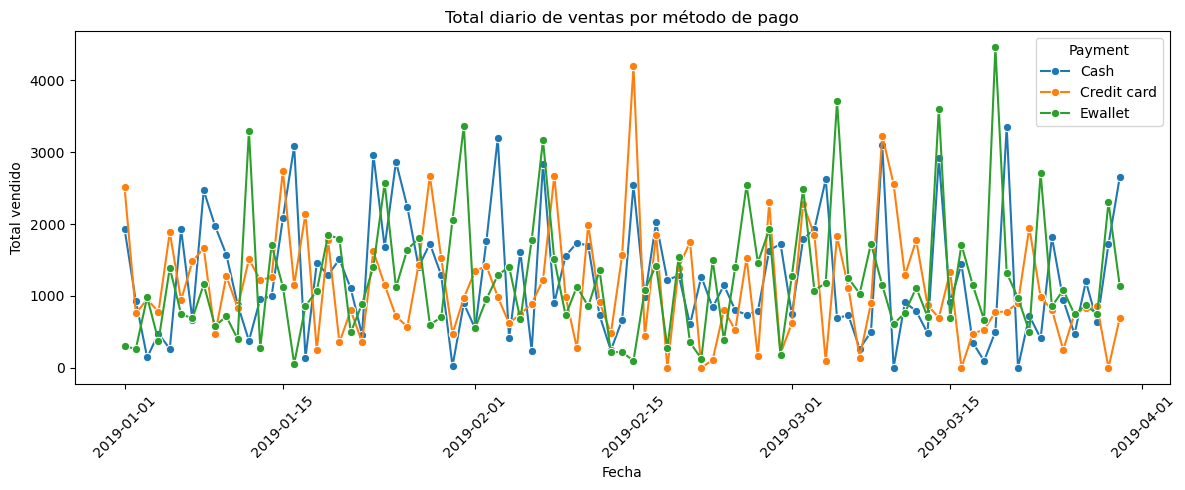

In [55]:
# 4 Total diario método de pago

ventas_pago = df.groupby(['Date', 'Payment'])['Total'].sum().reset_index()

plt.figure(figsize=(12,5))
sns.lineplot(data=ventas_pago, x='Date', y='Total', hue='Payment', marker='o')
plt.title('Total diario de ventas por método de pago')
plt.ylabel('Total vendido')
plt.xlabel('Fecha')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 7 Resumen de hallazgos clave

### A continuación, se presenta un resumen de los insights más significativos obtenidos del Análisis Exploratorio de Datos. Este resumen está estructurado para resaltar los puntos más valiosos y demostrar una comprensión profunda del dataset.

#### 1. Integridad y Estructura de los Datos

**Calidad de datos:** El dataset se encuentra en un estado óptimo, sin valores nulos ni duplicados, lo que permite un análisis directo sin necesidad de una limpieza exhaustiva.

**Redundancia:** Se identificó que la variable Porcentaje de margen bruto es constante en todo el conjunto de datos y no aporta valor, por lo que puede ser ignorada en futuros análisis o modelados, además de no haber sido considerada en el mapa de calor.

#### 2. Análisis Descriptivo y Univariado

**Distribuciones clave:** Las variables  Precio unitario, Cantidad y Rating presentan distribuciones uniformes, mientras que las métricas de venta (Total, cdlbv, ingreso bruto) están sesgadas positivamente, lo que es común en datos transaccionales.

**Outliers:** Se detectaron 9 valores atípicos en las métricas de venta, representando transacciones de alto valor que podrían ser objeto de un análisis específico (por ejemplo, pedidos o compras grandes).

#### 3. Relaciones entre Variables

**Correlación perfecta:** Las métricas de venta (Impuesto 5%, Total, cdlbv, ingreso bruto) están perfectamente correlacionadas entre sí. Esto significa que una variable puede ser calculada directamente a partir de las otras, lo que en estadística se conoce como multicolinealidad. Este hallazgo es crucial para el modelado, ya que sugiere que una de estas variables es suficiente para representar la información del grupo.

**Independencia del Rating:** La calificación de los clientes (Rating) no tiene una correlación significativa con ninguna otra variable numérica, indicando que la satisfacción del cliente se comporta de forma independiente al valor de la transacción.

#### 4. Segmentación y Comportamiento de Clientes

**Uniformidad de gasto:** El comportamiento de gasto, el ingreso bruto y las preferencias de pago son consistentemente uniformes entre las diferentes categorías de género y tipo de cliente, lo que indica que no hay un sesgo de mercado significativo en estos segmentos.

**Preferencias por línea de producto:** Se encontró una segmentación de preferencias clara por género. Las mujeres tienden a comprar accesorios de moda, mientras que los hombres prefieren accesorios electrónicos y de cuidado personal, un hallazgo crucial para estrategias de marketing dirigidas.

**Patrones por sucursal:** El uso de los métodos de pago (Payment) varía significativamente por sucursal (Branch), sugiriendo diferencias operativas o demográficas locales.

#### 5. Tendencias Temporales

**Estacionalidad semanal:** Se observó un patrón cíclico de picos y valles en las ventas diarias, lo que sugiere una estacionalidad semanal.

**Diferenciación por sucursal:** A nivel temporal, la variabilidad de las ventas es independiente para cada Ciudad, lo que implica que el rendimiento de cada sucursal está influenciado por factores locales específicos.

#### 6 Sugerencias para posible modelado futuro: 

Se recomienda crear un modelo de regresión para predecir las ventas diarias, utilizando variables dummy para las ciudades, dado su comportamiento temporal diferenciado.